# Exercises: Data Analysis with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Boyle-Mariotte
Air is enclosed in a cylinder whose circular base has a radius of 2.5 cm. The length of the air volume can be adjusted with a movable piston. The pressure in the cylinder is measured for different positions of the piston.

In [2]:
# length of air volume in cm
L = np.array([20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.5, 6.0, 5.5, 5.0])

# pressure in bar
p = np.array([1.00, 1.05, 1.10, 1.20, 1.25, 1.35, 1.45, 1.55, 1.70, 1.80, 2.00, 2.20, 2.45, 2.80, 3.00, 3.20, 3.50, 3.80])

Calculate the air volumes.

In [11]:
r = 2.5 # radius in cm

# volume = length x base = length x r^2 x π
V = L * r**2 * np.pi

Graph the pressure vs. volume diagram.

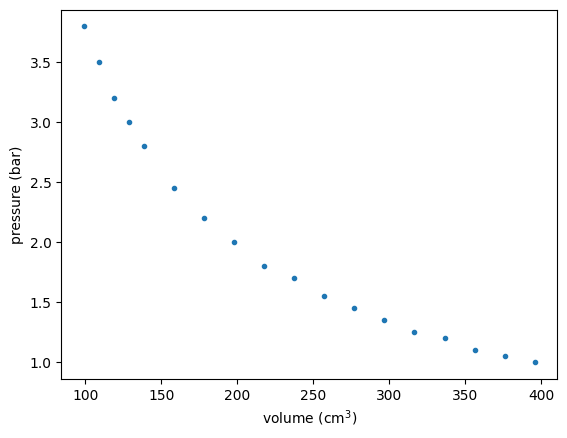

In [9]:
plt.plot(V, p, '.')
plt.xlabel(r'volume (cm$^3$)')
plt.ylabel('pressure (bar)')
plt.show()

The theory (Boyle-Mariotte law) predicts an inverse proportionality between pressure and volume:

<p style="text-align: center;">$p = \frac{n R T}{V}$</p>

Visually verify the model with an appropriate fit function.

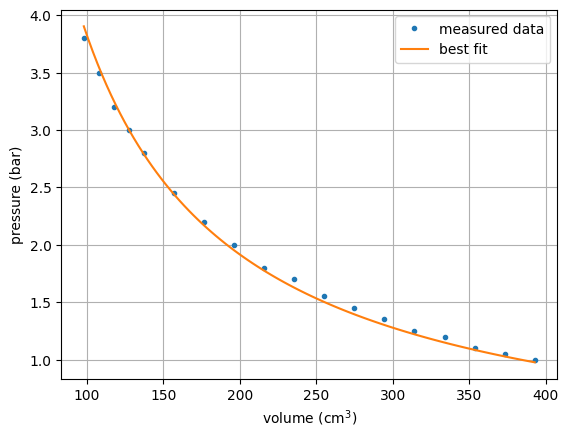

In [61]:
from scipy.optimize import curve_fit

def f(V, const):
    return const/V

coeff, pcov = curve_fit(f, V, p)
const = coeff[0]

Vrange = np.linspace(min(V), max(V), 100) # V-values to evaluate fit function

p_fit = f(Vrange, const)

plt.plot(V, p, '.', label='measured data')
plt.plot(Vrange, p_fit, label='best fit')
plt.xlabel(r'volume (cm$^3$)')
plt.ylabel('pressure (bar)')
plt.grid()
plt.legend()
plt.show()

The accuracies for the measurements are 0.05 cm for the radius, 0.05 cm for the lengths, and 0.05 bar for the pressure. Calculate the accuracies for the volumes and add error bars to the graph.

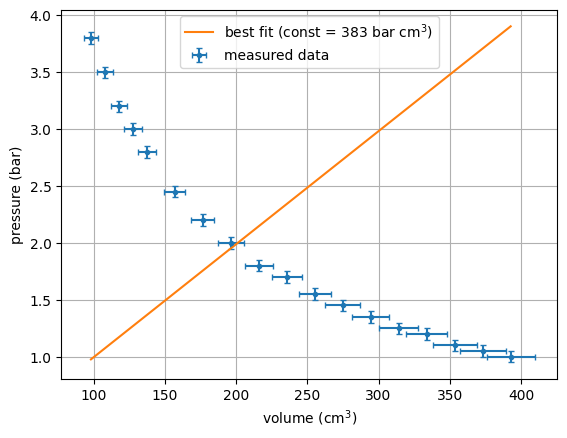

In [74]:
dr = 0.05 # accuracy for radius in cm
dL = 0.05 # accuracy for lengths in cm
dp = 0.05 # accuracy for pressure in bar

rmax = r + dr
Lmax = L + dL
Vmax = Lmax * rmax**2 * np.pi

dV = Vmax - V
fit_label = f'best fit (const = {const:.0f} ' + r'bar cm$^3$)'
plt.errorbar(V, p, xerr=dV, yerr=dp, fmt='.', capsize=2, label='measured data')
plt.plot(Vrange, p_fit, label=fit_label)
plt.xlabel(r'volume (cm$^3$)')
plt.ylabel('pressure (bar)')
plt.grid()
plt.legend()
plt.show()

Make a residual plot to inspect the quality of the fit function.

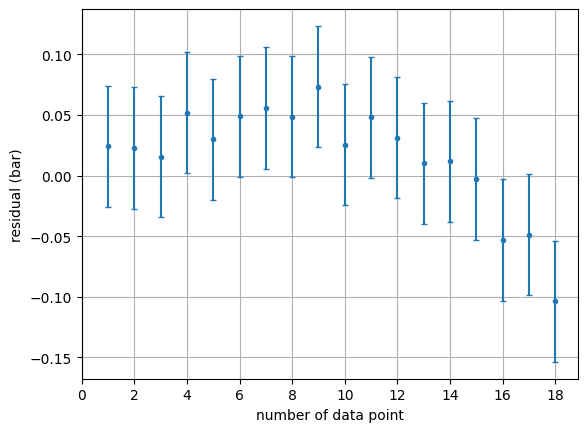

In [64]:
res = p - f(V, const)
n_datapoint = range(1, len(res)+1)

plt.errorbar(n_datapoint, res, yerr=dp, capsize=2, fmt='.')
plt.xlabel('number of data point')
plt.ylabel('residual (bar)')
plt.xticks(np.arange(0, len(res)+1, 2))
plt.grid()
plt.show()

The analysis can also be done by graphing the pressure vs. the reciprocal value of the volume. Verify if the fit parameters for the two methods are compatible.

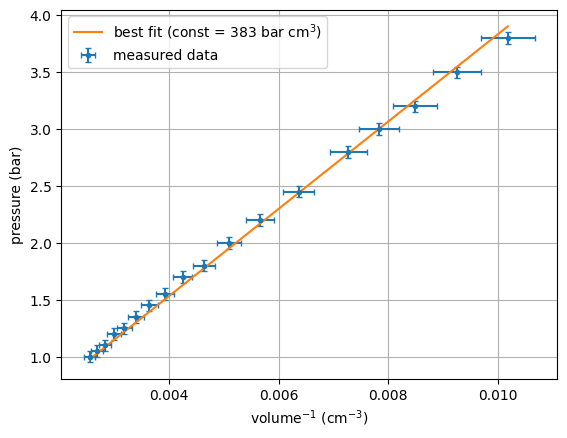

In [76]:
Vr = 1/V # reciprocal values of volume
Vrmin = 1/Vmax # minimal values within error range
dVr = Vr - Vrmin # accuracy for reciprocal value

def g(V, const):
    return const * V

coeffr, pcovr = curve_fit(g, Vr, p)
constr = coeffr[0]

Vrrange = np.linspace(min(Vr), max(Vr), 100) # Vr-values to evaluate fit function
p_fit = g(Vrrange, constr)
fit_label = f'best fit (const = {constr:.0f} ' + r'bar cm$^3$)'

plt.errorbar(Vr, p, xerr=dVr, yerr=dp, capsize=2, fmt='.', label='measured data')
plt.plot(Vrrange, p_fit, label=fit_label)
plt.xlabel(r'volume$^{-1}$ (cm$^{-3}$)')
plt.ylabel('pressure (bar)')
plt.legend()
plt.grid()
plt.show()

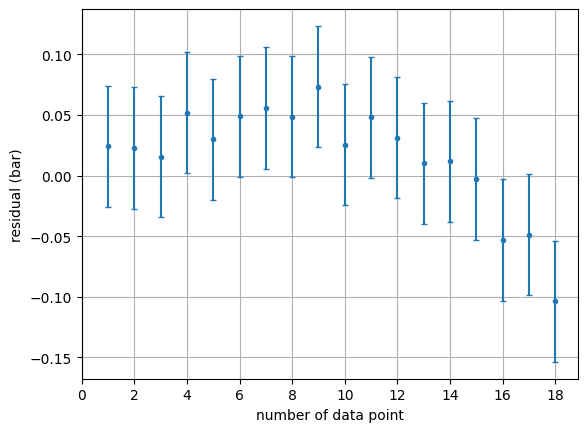

In [67]:
resr = p - g(Vr, constr)
n_datapoint = range(1, len(res)+1)

plt.errorbar(n_datapoint, resr, yerr=dp, capsize=2, fmt='.')
plt.xlabel('number of data point')
plt.ylabel('residual (bar)')
plt.xticks(np.arange(0, len(res)+1, 2))
plt.grid()
plt.show()

In [79]:
dc = np.sqrt(pcov[0, 0])
dcr = np.sqrt(pcovr[0, 0])

print(f'fit parameter for first method:  const = ({const:.0f} ± {dc:.0f}) bar cm^3')
print(f'fit parameter for second method: const = ({constr:.0f} ± {dcr:.0f}) bar cm^3')

fit parameter for first method:  const = (383 ± 2) bar cm^3
fit parameter for second method: const = (383 ± 2) bar cm^3


Not so surprisingly, the two methods yield the same result for the fit parameter.